# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

### Setup

In [1]:
%matplotlib inline

In [2]:
import cv2
import helpers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
import tensorflow.contrib.layers as tfcl

from collections import Counter
from sklearn.utils import shuffle
from tqdm import tqdm

ix = helpers.EXAMPLE_IMG_INDEX

### Load

In [3]:
(training_file, 
     validation_file, 
     testing_file) = helpers.get_traffic_signs_data()

File download skipped, it already exists, use force==True to overwrite.

Skipping unzipping of pickled files, as they've been previously extracted,
use force==True to overwrite


In [4]:
# Load pickled data
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
    
with open(validation_file, mode='rb') as f:
    validation = pickle.load(f)
    
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train, X_train_sizes, X_train_coords = train['features'], train['labels'], train['sizes'], train['coords']
X_validation, y_validation, X_validation_sizes, X_validation_coords = validation['features'], validation['labels'], validation['sizes'], validation['coords']
X_test, y_test, X_test_sizes, X_test_coords = test['features'], test['labels'], test['sizes'], test['coords']

print(type(X_train))

<class 'numpy.ndarray'>


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples\t= {:>6,}".format(n_train))
print("Number of validation examples\t= {:>6,}".format(n_validation))
print("Number of testing examples\t= {:>6,}".format(n_test))
print("-" * 40)
print("Total examples\t\t\t= {:>6,}\n".format(n_train + n_validation + n_test))
print("Image data shape\t\t= {}".format(image_shape))
print("Number of classes\t\t= {}".format(n_classes))

Number of training examples	= 34,799
Number of validation examples	=  4,410
Number of testing examples	= 12,630
----------------------------------------
Total examples			= 51,839

Image data shape		= (32, 32, 3)
Number of classes		= 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

33
(32, 32, 3)


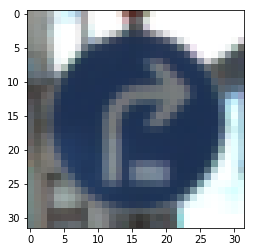

[[[148 148 142]
  [153 154 151]
  [151 154 152]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[147 147 142]
  [147 150 146]
  [142 148 147]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[143 145 141]
  [146 151 149]
  [138 144 142]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ..., 
 [[117 134 132]
  [122 127 123]
  [118 113 110]
  ..., 
  [247 255 255]
  [242 255 255]
  [248 255 255]]

 [[110 129 127]
  [119 124 120]
  [120 113 108]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[109 124 124]
  [118 122 115]
  [120 112 105]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [6]:
# EXAMPLE_IMG_INDEX = 34798

# def print_example(X, y, img_num = None):
#     if img_num == None:
#         img_num = EXAMPLE_IMG_INDEX
    
#     print(y[img_num])
#     print(X[img_num].shape)
    
#     plt.imshow(X[img_num])
#     plt.show()
    
#     print(X[img_num])
    
helpers.print_example(X_train, y_train)

Grayscale and the Y channel, from image when converted to YUV, are almost the same

In [7]:
def inspect_channels(img):
    # show rgb
    plt.imshow(img)
    plt.show()

    # show grayscale
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
    plt.show()

    # yuv channels
    y_channel, u_channel, v_channel = cv2.split(cv2.cvtColor(img, cv2.COLOR_RGB2YUV))

    # show y channel
    plt.imshow(y_channel)
    plt.show()

    # show u channel
    plt.imshow(u_channel)
    plt.show()

    # show v channel
    plt.imshow(v_channel)
    plt.show()
    
    # show u + v channel averaged
    plt.imshow(np.mean( np.array([u_channel, v_channel]), axis=0))
    plt.show()

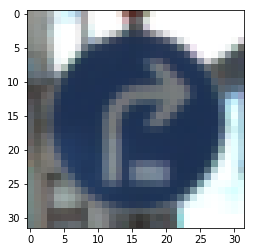

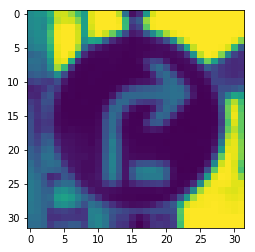

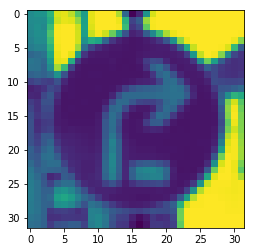

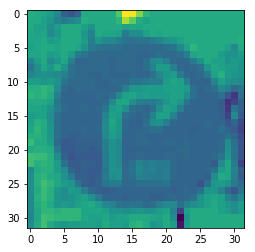

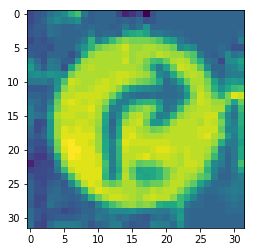

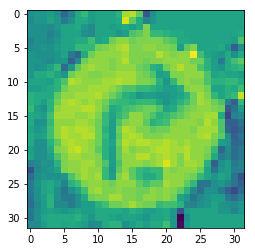

In [8]:
img = X_train[ix][:].copy()
inspect_channels(img)

### Bounding box

In [9]:
X_train_sizes[ix]

array([72, 69], dtype=uint8)

In [10]:
x_scale, y_scale = 32 / X_train_sizes[ix]
print("x_scale = {:.3f}\ny_scale = {:.3f}".format(y_scale, x_scale))

x_scale = 0.464
y_scale = 0.444


Coords structure is (x1, y1, x2, y2)

In [11]:
X_train_coords[ix]

array([ 6,  6, 66, 63], dtype=uint8)

In [12]:
# x1, x2 = [int(X_train_coords[ix][i] * x_scale) for i in (0, 2)]

In [13]:
x1, x2 = np.array(X_train_coords[ix][[0, 2]] * x_scale, np.uint8)

In [14]:
# y1, y2 = [int(X_train_coords[EXAMPLE_IMG_INDEX][i] * y_scale) for i in (1, 3)]

In [15]:
y1, y2 = np.array(X_train_coords[ix][[1, 3]] * y_scale, np.uint8)

In [16]:
np.array([x1, y1, x2, y2])

array([ 2,  2, 29, 29], dtype=uint8)

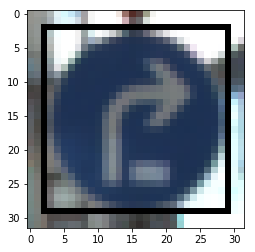

In [17]:
img = cv2.rectangle(img, (x1, y1), (x2, y2), [0, 0, 0])
plt.imshow(img)
plt.show()

In [18]:
ignore_mask_color = 255

left_top = [x1, y1]
left_bottom = [x1, y2]
right_top = [x2, y1]
right_bottom = [x2, y2]

vertices = np.array([[left_bottom, left_top, right_top, right_bottom]], np.int32)
vertices

array([[[ 2, 29],
        [ 2,  2],
        [29,  2],
        [29, 29]]], dtype=int32)

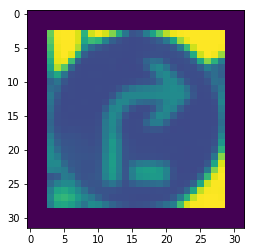

In [19]:
y_channel, _, _ = cv2.split(cv2.cvtColor(img, cv2.COLOR_RGB2YUV))
mask = np.zeros_like(y_channel)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_img = cv2.bitwise_and(y_channel, mask)

plt.imshow(masked_img)
plt.show()

### Inspection to see if data is sorted

The data looks sorted to some degree, therefore it will require shuffling before passing through the
CNN.

In [20]:
y_train[:9]

array([41, 41, 41, 41, 41, 41, 41, 41, 41], dtype=uint8)

In [21]:
y_train[25786:25795]

array([21, 21, 21, 21, 21, 21, 21, 21, 21], dtype=uint8)

In [22]:
classes = Counter()

for y in y_train:
    classes[y] += 1

### Inspection to ensure enough observations exist for each class

In [23]:
classes.most_common(10)

[(2, 2010),
 (1, 1980),
 (13, 1920),
 (12, 1890),
 (38, 1860),
 (10, 1800),
 (4, 1770),
 (5, 1650),
 (25, 1350),
 (9, 1320)]

In [24]:
# 10 least common
classes.most_common()[:-10:-1]  

[(37, 180),
 (19, 180),
 (0, 180),
 (42, 210),
 (41, 210),
 (32, 210),
 (27, 210),
 (29, 240),
 (24, 240)]

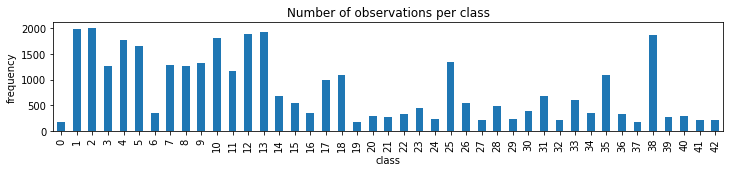

In [25]:
df = pd.Series(classes)
df.plot(kind="bar", figsize=(12,2))

plt.title("Number of observations per class")
plt.xlabel("class")
plt.ylabel("frequency")
plt.show()

### Demonstrate augmented data to make n_obs per class more uniform

Set target number of images for each class to be double the max:
  * class '2' has 2010 observations
  * therefore the target should be 4020

In [26]:
target_images_per_class = classes.most_common(1)[0][1] * 2
target_images_per_class

4020

In [27]:
replication_factors = dict()

for class_num, n_obs in classes.items():
    replication_factors[class_num] = round(target_images_per_class / n_obs)
    
replication_factors

{0: 22,
 1: 2,
 2: 2,
 3: 3,
 4: 2,
 5: 2,
 6: 11,
 7: 3,
 8: 3,
 9: 3,
 10: 2,
 11: 3,
 12: 2,
 13: 2,
 14: 6,
 15: 7,
 16: 11,
 17: 4,
 18: 4,
 19: 22,
 20: 13,
 21: 15,
 22: 12,
 23: 9,
 24: 17,
 25: 3,
 26: 7,
 27: 19,
 28: 8,
 29: 17,
 30: 10,
 31: 6,
 32: 19,
 33: 7,
 34: 11,
 35: 4,
 36: 12,
 37: 22,
 38: 2,
 39: 15,
 40: 13,
 41: 19,
 42: 19}

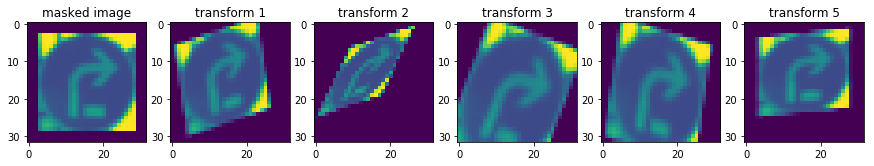

In [28]:
rows, cols = masked_img.shape

x1 = 5
x2 = 25
y1 = 5
y2 = 25

left_top = [x1, y1]
left_bottom = [x1, y2]
right_top = [x2, y1]

n_plots = 5

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, n_plots + 1, 1)
ax.imshow(masked_img)
ax.set_title('masked image')
    
for i in range(n_plots):
    warp = np.random.uniform(-5, 5, size=6)

    warp_left_top = [x1 + warp[0], y1 + warp[1]]
    warp_left_bottom = [x1 + warp[2], y2 + warp[3]]
    warp_right_top = [x2 + warp[4], y1 + warp[5]]

    pts1 = np.float32([left_top, left_bottom, right_top])
    pts2 = np.float32([warp_left_top, warp_left_bottom, warp_right_top])

    M = cv2.getAffineTransform(pts1, pts2)
    dst = cv2.warpAffine(masked_img, M, (cols,rows))

    ax = fig.add_subplot(1, n_plots + 1, i + 2)
    ax.imshow(dst)
    ax.set_title('transform {}'.format(i + 1))

In [29]:
del rows, cols, x1, y1, x2, y2, ignore_mask_color
del left_bottom, left_top, right_top, right_bottom
del vertices, y_channel, mask, masked_img, img
del classes, df, x_scale, y_scale,
del n_plots, warp_left_top, warp_left_bottom, warp_right_top
del pts1, pts2, M, dst, ax, fig

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Region of interest

In [30]:
def roi_scaled_coords(img_size, coords):
    x_scale, y_scale = 32 / img_size
    
    x1, x2 = [int(coords[i] * x_scale) for i in (0, 2)]
    y1, y2 = [int(coords[i] * y_scale) for i in (1, 3)]
    
    return x1, y1, x2, y2

In [31]:
def roi_vertices(img_size, coords):
    x1, y1, x2, y2 = roi_scaled_coords(img_size, coords)
    
    left_top = [x1, y1]
    left_bottom = [x1, y2]
    right_top = [x2, y1]
    right_bottom = [x2, y2]
    
    vertices = np.array([[left_bottom, left_top, right_top, right_bottom]])
    
    return vertices

In [32]:
def roi_bounding_box(img, img_size, coords):
    x1, y1, x2, y2 = roi_scaled_coords(img_size, coords)
    
    # remove colour from bounding box
    roi_bbox_img = cv2.rectangle(img, (x1, y1), (x2, y2), [0, 0, 0])
    
    return roi_bbox_img

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    
    #filling pixels inside the polygon defined by "vertices" with the fill color
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    
    return masked_image

In [33]:
def region_of_interest(img, img_size, coords):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    # get vertices for image to define the bounding box
    vertices = roi_vertices(img_size, coords)
    
    # remove colour from image on bounding box boundary
    img = roi_bounding_box(img, img_size, coords)
    
    #filling pixels inside the polygon defined by "vertices" with the fill color
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    
    return masked_image

In [34]:
X_train_roi = np.array([region_of_interest(img, img_size, coords) for img, img_size, coords in zip(X_train, X_train_sizes, X_train_coords)])
X_train_roi.shape

(34799, 32, 32, 3)

X_train_vertices = np.array([roi_vertices(size, coords) for size, coords in zip(X_train_sizes, X_train_coords)])
X_train_bbox = np.array([roi_bounding_box(img, size, coords) for img, size, coords in zip(X_train, X_train_sizes, X_train_coords)])
X_train_roi = np.array([region_of_interest(img, vertices) for img, vertices in zip(X_train_bbox, X_train_vertices)])
X_train_roi.shape

33
(32, 32, 3)


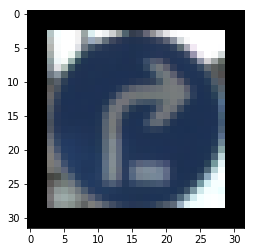

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ..., 
 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [35]:
helpers.print_example(X_train_roi, y_train)

### Convert images to grayscale

In [36]:
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [37]:
X_train_gray = np.array([grayscale(img) for img in X_train_roi])
X_train_gray.shape

(34799, 32, 32)

33
(32, 32)


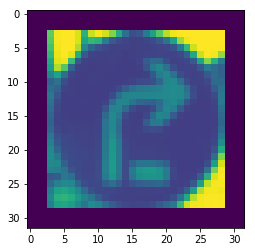

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [38]:
helpers.print_example(X_train_gray, y_train)

### Normalise

In [39]:
def normalise(img):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.
    : return: Numpy array of normalize data
    """
    return np.array((img / 255.0) - 0.5, dtype=np.float32)

In [40]:
X_train_norm = np.array([normalise(img) for img in X_train_gray])
X_train_norm.shape

(34799, 32, 32)

33
(32, 32)


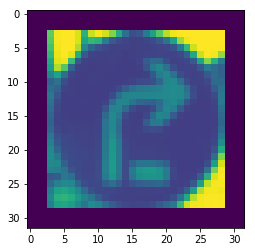

[[-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
 ..., 
 [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]]


In [41]:
helpers.print_example(X_train_norm, y_train)

### Rotate image

In [42]:
def rotate_image(img):
    # currently hardcoded to deal with 2D images only
    # use the line below to capture channel count when
    # using images > 2D
    #   -> rows, cols, ch = img.shape
    rows, cols = img.shape
    output_size  = (cols, rows)
    
    img_centre = tuple(np.array(img.shape) / 2)
    angle = np.random.uniform(-30, 30)
    
    M = cv2.getRotationMatrix2D(img_centre, angle, 1.0)
    rotated_image = cv2.warpAffine(img, M, output_size, flags=cv2.INTER_LINEAR)
    
    return rotated_image

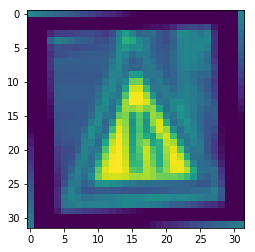

In [43]:
plt.imshow(rotate_image(X_train_norm[10900]))

### Affine transform image

In [44]:
def affine_transform(img):
    """
    Performs affine transformation of an image
    
    img       -> image to transform
    """
    # currently hardcoded to deal with 2D images only
    # use the line below to capture channel count when
    # using images > 2D
    #   -> rows, cols, ch = img.shape
    rows, cols = img.shape
    output_size  = (cols, rows)

    # The bellow show relative position within the image
    # that the 'anchors' will be set to
    # These anchors are then later randomly 'jittered',
    # which then allows us to warp the image based on the
    # new position of the jittered anchors.
    #   -> lt = left_top
    #   -> lb = left_bottom
    #   -> rt = right_top
    #
    # +-------------+
    # |  lt      rt |
    # |             |
    # |             |
    # |             |
    # |  lb         |
    # +-------------+
    x1 = 5
    x2 = 25
    y1 = 5
    y2 = 25

    # anchor positions
    # note the 6 seperate parameters (even though only four variables are used)
    left_top = [x1, y1]
    left_bottom = [x1, y2]
    right_top = [x2, y1]
    
    # generate 6 random warps to apply to the 6 parameters
    warp = np.random.uniform(-5, 5, size=6)

    # warped anchor postions
    warp_left_top = [x1 + warp[0], y1 + warp[1]]
    warp_left_bottom = [x1 + warp[2], y2 + warp[3]]
    warp_right_top = [x2 + warp[4], y1 + warp[5]]

    # set anchors and jitter locations
    anchors = np.float32([left_top, left_bottom, right_top])
    jittered = np.float32([warp_left_top, warp_left_bottom, warp_right_top])
    
    # perform the transform
    M = cv2.getAffineTransform(anchors, jittered)
    warped_image = cv2.warpAffine(img, M, output_size)
            
    return np.array(warped_image)

In [45]:
def replicated_affine_transform(img, one_hot_class, replication_factor=1):
    """
    Augments data by performing affine transformations of an image
    
    img       -> image to transform
    replicate -> the number of transformations to perform
    """
    transforms = []
    one_hot_classes = [one_hot_class] * replication_factor
    
    for i in range(replication_factor):
        transforms.append(affine_transform(img))
        
    return transforms, one_hot_classes

In [46]:
X_augmentations = []
y_augmentations = []

for img, y in tqdm(zip(X_train_norm, y_train)):
    replication_factor = replication_factors.get(y)
    X_augmented, y_augmented = replicated_affine_transform(img, y, replication_factor)

    X_augmentations += X_augmented
    y_augmentations += y_augmented

X_train_augmented = np.concatenate([X_train_norm, np.array(X_augmentations)])
y_train_augmented = np.concatenate([y_train, np.array(y_augmentations)])

34799it [00:08, 4295.31it/s]


In [47]:
X_train_augmented.shape

(203632, 32, 32)

In [48]:
y_train_augmented.shape

(203632,)

In [49]:
augmented_classes = Counter()

for y in y_train_augmented:
    augmented_classes[y] += 1

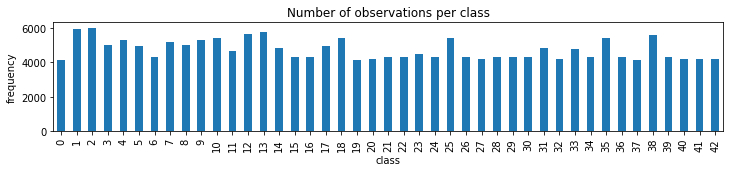

In [50]:
df = pd.Series(augmented_classes)
df.plot(kind="bar", figsize=(12,2))

plt.title("Number of observations per class")
plt.xlabel("class")
plt.ylabel("frequency")
plt.show()

### Shuffle

In [51]:
X_train_shuffled, y_train_shuffled = shuffle(X_train_augmented, y_train_augmented)

In [52]:
y_train_shuffled[:9]

array([33, 39, 18,  3, 24, 22, 27, 31, 34], dtype=uint8)

8
(32, 32)


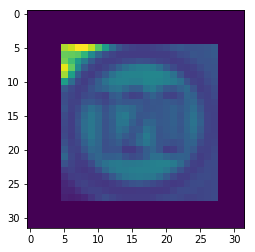

[[-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
 ..., 
 [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]]


In [53]:
helpers.print_example(X_train_shuffled, y_train_shuffled)

# Clean memory prior to running Main section

In [54]:
del target_images_per_class, replication_factors
del X_train_roi
del X_train_gray
del X_train_norm
del X_augmentations, y_augmentations
del X_train_augmented, y_train_augmented
del augmented_classes, df
del X_train_shuffled, y_train_shuffled

In [55]:
import gc

gc.collect()

51043

# Main

### Pre-process data

In [56]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
# def preprocess_data(X, y, X_sizes, X_coords):
def preprocess_data(X, X_sizes=None, X_coords=None, reshape=False):
    X = [grayscale(x) for x in X]
    
#     if not (X_sizes is None) and not(X_coords is None):
#         X_vertices = [roi_vertices(size, coords) for size, coords in zip(X_sizes, X_coords)]
#         X = [roi_bounding_box(x, size, coords) for x, size, coords in zip(X, X_sizes, X_coords)]
#         X = [region_of_interest(x, vertices) for x, vertices in zip(X, X_vertices)]
    
    X = [normalise(x) for x in X]

    if reshape:
        X = [np.reshape(img, [32, 32, 1]) for img in X]
    
    return np.array(X)

In [57]:
# X_train = preprocess_data(X_train, y_train, X_train_sizes, X_train_coords)
# X_validation = preprocess_data(X_validation, y_validation, X_validation_sizes, X_validation_coords)
X_train = preprocess_data(X_train, X_train_sizes, X_train_coords)
X_validation = preprocess_data(X_validation, X_validation_sizes, X_validation_coords)
X_test = preprocess_data(X_test, X_validation_sizes, X_validation_coords, True)

In [58]:
X_train[0].shape

(32, 32)

### Augment data

In [59]:
def augment_data(X_train, y_train, X_train_sizes, X_train_coords):
    classes = Counter()
    replication_factors = dict()
    X_augmentations = []
    y_augmentations = []

    # get counts of classes
    for y in y_train:
        classes[y] += 1

    # set target count per class based on class with max count
    target_images_per_class = classes.most_common(1)[0][1]

    # determine replication factors for each image to aim for uniform
    # observations frequency counts
    for class_num, n_obs in classes.items():
        replication_factors[class_num] = max(round(target_images_per_class / n_obs), 2)

    # perform transforms to create augmented images
    for img, y, img_size, coords in zip(X_train, y_train, X_train_sizes, X_train_coords):
        # create image where only the region of interest is kept
        X_augmentations.append(region_of_interest(img, img_size, coords))
        y_augmentations.append(y)
        
        # create a randomly rotated copy of the image
        X_augmentations.append(rotate_image(img))
        y_augmentations.append(y)
        
        # perform affine transforms for each image based on the replication factor
        replication_factor = replication_factors.get(y)
        X_augmented, y_augmented = replicated_affine_transform(img, y, replication_factor)
        
        X_augmentations += X_augmented
        y_augmentations += y_augmented

    # augment the training sets
    X_train = np.concatenate([X_train, np.array(X_augmentations)])
    y_train = np.concatenate([y_train, np.array(y_augmentations)])
    
    return X_train, y_train

In [60]:
X_train, y_train = augment_data(X_train, y_train, X_train_sizes, X_train_coords)

## Reshape the data to 3D instead of 2D

In [61]:
X_train = np.array([np.reshape(x, [32, 32, 1]) for x in X_train])
X_validation = np.array([np.reshape(x, [32, 32, 1]) for x in X_validation])

In [62]:
X_train[0].shape

(32, 32, 1)

In [63]:
X_train.shape

(208284, 32, 32, 1)

In [64]:
y_train.shape

(208284,)

In [65]:
X_validation.shape

(4410, 32, 32, 1)

In [66]:
classes = Counter()

for y in y_train:
    classes[y] += 1

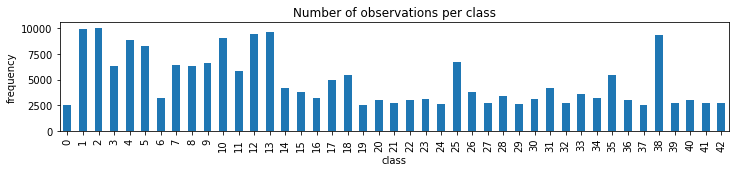

In [67]:
df = pd.Series(classes)
df.plot(kind="bar", figsize=(12,2))

plt.title("Number of observations per class")
plt.xlabel("class")
plt.ylabel("frequency")
plt.show()

## Model Architecture

In [82]:
# http://stackoverflow.com/a/43011613/893766
# https://hacktilldawn.com/2016/09/25/inception-modules-explained-and-implemented/
# https://arxiv.org/pdf/1511.07289.pdf
# https://www.tensorflow.org/get_started/mnist/pros#first_convolutional_layer
def inception_module(x, mu, sigma, in_channels, n_filters):
    # bias dimension = 3*filter_count and then the extra in_channels for the avg pooling
    # bias = tf.Variable(tf.zeros([3 * n_filters + in_channels]))

    # 1x1
    # five_filter is the weights for the 1x1 convolution
    one_filter = tf.Variable(tf.truncated_normal([1, 1, in_channels, n_filters], mu, sigma))
    one_bias = tf.Variable(tf.zeros(n_filters))
    one_by_one = tf.nn.conv2d(x, one_filter, strides=[1, 1, 1, 1], padding='SAME') + one_bias
    one_by_one = tf.nn.elu(one_by_one)

    # 3x3
    # five_filter is the weights for the 1x1 convolution
    # we convulve over the 1x1 output NOT x
    three_filter = tf.Variable(tf.truncated_normal([3, 3, n_filters, n_filters], mu, sigma))
    three_bias = tf.Variable(tf.zeros(n_filters))
    three_by_three = tf.nn.conv2d(one_by_one, three_filter, strides=[1, 1, 1, 1], padding='SAME') + three_bias
    three_by_three = tf.nn.elu(three_by_three)

    # 5x5
    # five_filter is the weights for the 1x1 convolution
    # we convulve over the 1x1 output NOT x
    five_filter = tf.Variable(tf.truncated_normal([5, 5, n_filters, n_filters], mu, sigma))
    five_bias = tf.Variable(tf.zeros(n_filters))
    five_by_five = tf.nn.conv2d(one_by_one, five_filter, strides=[1, 1, 1, 1], padding='SAME') + five_bias
    five_by_five = tf.nn.elu(five_by_five)

    # avg pooling over x
    pooling = tf.nn.avg_pool(x, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='SAME')
    pool_bias = tf.Variable(tf.zeros(n_filters))
    pooling = tf.nn.conv2d(pooling, one_filter, strides=[1, 1, 1, 1], padding='SAME') + pool_bias
    pooling = tf.nn.elu(pooling)

    # tensorflow 1.0+ -> use tf.concat(), NOT tf.concat_v2()
    x = tf.concat_v2([one_by_one, three_by_three, five_by_five, pooling], 3)
    #x = tf.nn.bias_add(x, bias)
    
    #return tf.nn.elu(x)
    return x

In [83]:
# http://www.cs.toronto.edu/~guerzhoy/321/lec/W06/convnets.pdf
# not used in this solution, it was tested, but later changed back to use
# the modified Lenet version
def inception(x, mu, sigma, in_channels, n_filters, keep_prob):
    
    # inception module
    i1 = inception_module(x, mu, sigma, in_channels, n_filters)
    
    # flatten
    fc0 = tfcl.flatten(i1)
    
    # fully connected layer 1
    fc1 = tfcl.fully_connected(fc0, 2056, activation_fn=tf.nn.elu)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # fully connected layer 2
    fc2 = tfcl.fully_connected(fc1, 1024, activation_fn=tf.nn.elu)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # logits / output layer / fully connected layer 3
    logits = tfcl.fully_connected(fc2, 43, activation_fn=None)

    return logits

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf
def LeCept(x, mu, sigma, in_channels, n_filters, keep_prob): 
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.elu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.elu(conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # inception module
    i1 = inception_module(x, mu, sigma, in_channels, n_filters)

    # Flatten. Input = 5x5x16. Output = 400.
    conv1 = tfcl.flatten(conv1)
    conv2 = tfcl.flatten(conv2)
    i1 = tfcl.flatten(i1)
    fc0 = tf.concat(1, [conv1, conv2, i1])
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tfcl.fully_connected(fc0, 120, activation_fn=tf.nn.elu)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tfcl.fully_connected(fc1, 84, activation_fn=tf.nn.elu)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tfcl.fully_connected(fc2, 43, activation_fn=None)
    
    return logits

### Hyperparameters

In [84]:
# batching
epochs = 20
batch_size = 128
in_channels = 1
n_filters = 16

# weight initialisation
mu = 0
sigma = 0.1

# dropout
keep_prob = 0.75

# optimiser
starter_learning_rate = 1e-3
decay_steps = len(X_train) / 4
decay_rate = 0.85

# stats
stats = np.zeros([epochs, 3])
df = pd.DataFrame(columns=['epoch', 'loss', 'accuracy'])

### Training pipeline

In [85]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           decay_steps, decay_rate, staircase=True)

#logits = LeCept(x, mu, sigma, in_channels, n_filters, keep_prob)
logits = inception(x, mu, sigma, in_channels, n_filters, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [86]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_loss = 0
    total_accuracy = 0
    
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset + batch_size], y_data[offset:offset + batch_size]
        
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y})
        
        total_loss += (loss * len(batch_x))
        total_accuracy += (accuracy * len(batch_x))
    
    validation_loss = total_loss / num_examples
    validation_accuracy = total_accuracy / num_examples
    
    return validation_loss, validation_accuracy

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    
    for i in range(epochs):
        epoch = i + 1
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            batch_x, batch_y = shuffle(batch_x, batch_y)
            
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_loss, validation_accuracy = evaluate(X_validation, y_validation)
        
        stats[i] = [epoch, validation_loss, validation_accuracy]
        print("Epoch {:>3}\tValidation Loss {:.3f}\tValidation Accuracy = {:.3f}".format(epoch, validation_loss, validation_accuracy))
        
    saver.save(sess, './lenet')
    print("Model saved")

In [ ]:
df = pd.DataFrame(stats, columns=['epoch', 'loss', 'accuracy'])
df.plot(x='epoch', y=['loss', 'accuracy'], figsize=(10, 6), subplots=True, sharex=True)

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import os
import os.path

directory = os.path.join('.', 'test_images')
directory

In [ ]:
images = []

for file_path in os.listdir(directory):
    if file_path.startswith("sign_") and file_path.endswith(".jpg"):       
        print(os.path.join(directory, file_path))
        images.append(mpimg.imread(os.path.join(directory, file_path)))

In [ ]:
for image in images:
    plt.imshow(image)
    plt.show()

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
X_predict = preprocess_data(images)

In [ ]:
plt.imshow(X_predict[0])

In [ ]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#scaling
# cv2.INTER_AREA is good for shrinking
resized = cv2.resize(X_predict[0][:], (32, 32), interpolation = cv2.INTER_AREA)
cv2.imshow("resized", resized)

In [ ]:
# http://stackoverflow.com/a/34092314/893766
#sess.run(y, feed_dict={x: mnist.test.images})

In [ ]:
# http://stackoverflow.com/a/41539608/893766
# predictions = sess.run(pred, feed_dict={x: img1})

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(y, feed_dict={X: X_predict})

In [ ]:
for prediction, image in zip(predictions, X_predict):
    print(prediction)
    plt.imshow(image)
    plt.show()

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")